In [1]:
import sys
sys.path.append("../") # go to parent dir

%load_ext autoreload
%autoreload 2

from PIL import Image
from pathlib import Path
from ddm.image.reader import read_frame, read_experiment
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import cddm

experiment_path = Path("..") / "data" / "1C01"

In [2]:
import cddm.video
import cddm.viewer

stack = read_experiment(experiment_path)

vid = cddm.video.load(stack.to_cddm_format(), len(stack.frames))



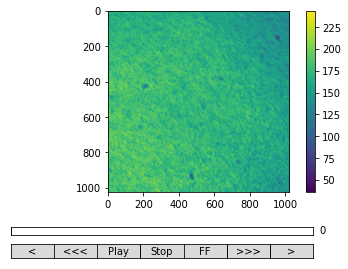

In [3]:
viewer = cddm.viewer.VideoViewer(vid, count=len(stack.frames))
viewer.show()

In [4]:
import cddm.fft

fft = cddm.fft.rfft2(vid)
fft_list = list(fft)

In [5]:
from cddm.core import acorr, normalize, stats
from cddm.video import asarrays

print(len(fft_list))
print(len(stack.frames))


arrays = asarrays(fft_list[:100], count=len(fft_list[:100]))


990
990


In [6]:
acorr_data = acorr(arrays)

In [9]:
bg, var = stats(arrays)
bg, var

(array([[[ 1.77812615e+08+0.00000000e+00j,
          -1.92618792e+06-5.18685493e+06j,
          -5.14596723e+05-3.03298369e+06j, ...,
           1.80072158e+04-2.03326713e+03j,
           2.19104085e+04+5.99698503e+03j,
           5.61870000e+04+0.00000000e+00j],
         [-2.09265535e+06+2.19167166e+06j,
          -6.73291860e+05+2.28086314e+04j,
           1.23673901e+05-2.62147022e+05j, ...,
          -2.08314502e+03-2.38198831e+03j,
          -1.55846068e+03+2.24209773e+03j,
          -1.35452105e+03+9.50580186e+02j],
         [-6.06756834e+05+1.43597304e+06j,
           1.26834554e+05+2.39083071e+05j,
           9.94976732e+04-1.29517385e+05j, ...,
          -3.10188884e+03+1.23024717e+03j,
           4.94018504e+03-1.99961077e+03j,
          -2.19234032e+03-2.79466726e+03j],
         ...,
         [ 4.99171082e+04-7.31419458e+05j,
           2.35679262e+05-7.05528690e+04j,
          -2.99176988e+05+3.15573198e+05j, ...,
          -7.07433077e+02-1.55935901e+03j,
          -5.0401

In [13]:
acorr_data[0].shape

(100, 1024, 513, 1)

In [14]:
lin_data = normalize(acorr_data, bg, var, scale=True)


c:\Users\jeppe\Code\DCF\.venv\lib\site-packages\cddm\norm.py:683: RuntimeWarning: invalid value encountered in true_divide
  result /= _scale_factor[...,None]
c:\Users\jeppe\Code\DCF\.venv\lib\site-packages\cddm\norm.py:683: RuntimeWarning: divide by zero encountered in true_divide
  result /= _scale_factor[...,None]


AssertionError: 

In [ ]:
dviewer = cddm.viewer.DataViewer(shape = (1024, 1024))
dviewer.set_da